# Breast Cancer Classification Model (SVM)
Breast cancer accounts for 25% of all cancers among women worldwide, being, in fact, the most common type of cancer. It affects 2.1 million people in 2015. A key challenge is to detect it early, which dramatically increases the rate of survival. In this project, I will be using a machine learning techinque, specifically Support Vector Machines, to help classify tumors into malignant or benign tumors based off dataset that was obtained from
<a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI's Breast Cancer Dataset.</a>
</html>

### I. A brief description of the Cancer Diagnosis Procedure & Problem Description
A brief overview of the diagnosis procedure is helpful in our project. First, doctors will obtain a fine needle aspirate (FNA), which is a culture of the suspected cancer cells obtained from the patient. From there, doctors take tumor images which are then converted into a dataset of features of cancer cells, such as the radius of the ceels, the texture, the permiter, the area, and the smoothness of the cells. We will then apply our techniques in supervised learning to help create a classifier to determine if the cancer is malignant or benign.

### II. Understanding the Classifier - Support Vector Machines
The idea behind the support vector is to find a boundary, known as the max margin hyperplane, created by support vectors on our dataset. The most common example of this is if we were to teach the model to classify between cats and dogs, it would use the most extreme versions - a doglike cat and a catlike dog - to "learn" how to classify them. In the same way, we will find the "most extreme" examples of our cancer cells and their features to create the maximal margin and they will become our supporting vectors (i.e. use the most benign "looking" malignant cancer cell and the most malignant "looking" benign cell).

## Exploratory Data Analysis (EDA)
#### Packages & Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading and Exploring our Data

In [9]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # Load our dataset which happens to be built into sklearn

In [51]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
print(cancer['DESCR']) # A brief description of the dataset below, if interested

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [37]:
print(cancer['target_names'])

['malignant' 'benign']


In [46]:
print('The 30 features of cancer cells in our dataset:\n\n',cancer['feature_names']) # All the features recorded in our dataset

The 30 features of cancer cells in our dataset:

 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [41]:
shape = cancer['data'].shape
print(f'There are {shape[0]} records in our dataset of {shape[1]} features')

There are 569 records in our dataset of 30 features


In [48]:
cancer_df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [52]:
cancer_df.sample(10) # Let's take a look at our dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
194,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,...,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701,0.0
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,28.07,120.40,1021.0,0.1243,0.1793,0.28030,0.10990,0.1603,0.06818,0.0
119,17.95,20.01,114.20,982.0,0.08402,0.06722,0.07293,0.05596,0.2129,0.05025,...,27.83,129.20,1261.0,0.1072,0.1202,0.22490,0.11850,0.4882,0.06111,0.0
555,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.1384,0.1710,0.20000,0.09127,0.2226,0.08283,1.0
199,14.45,20.22,94.49,642.7,0.09872,0.12060,0.11800,0.05980,0.1950,0.06466,...,30.12,117.90,1044.0,0.1552,0.4056,0.49670,0.18380,0.4753,0.10130,0.0
139,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784,1.0
345,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,...,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,1.0
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.1292,0.2074,0.17910,0.10700,0.3110,0.07592,1.0
472,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,18.22,112.00,906.6,0.1065,0.2791,0.31510,0.11470,0.2688,0.08273,1.0
426,10.48,14.98,67.49,333.6,0.09816,0.10130,0.06335,0.02218,0.1925,0.06915,...,21.57,81.41,440.4,0.1327,0.2996,0.29390,0.09310,0.3020,0.09646,1.0


In [54]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Some Visualizations using Seaborn

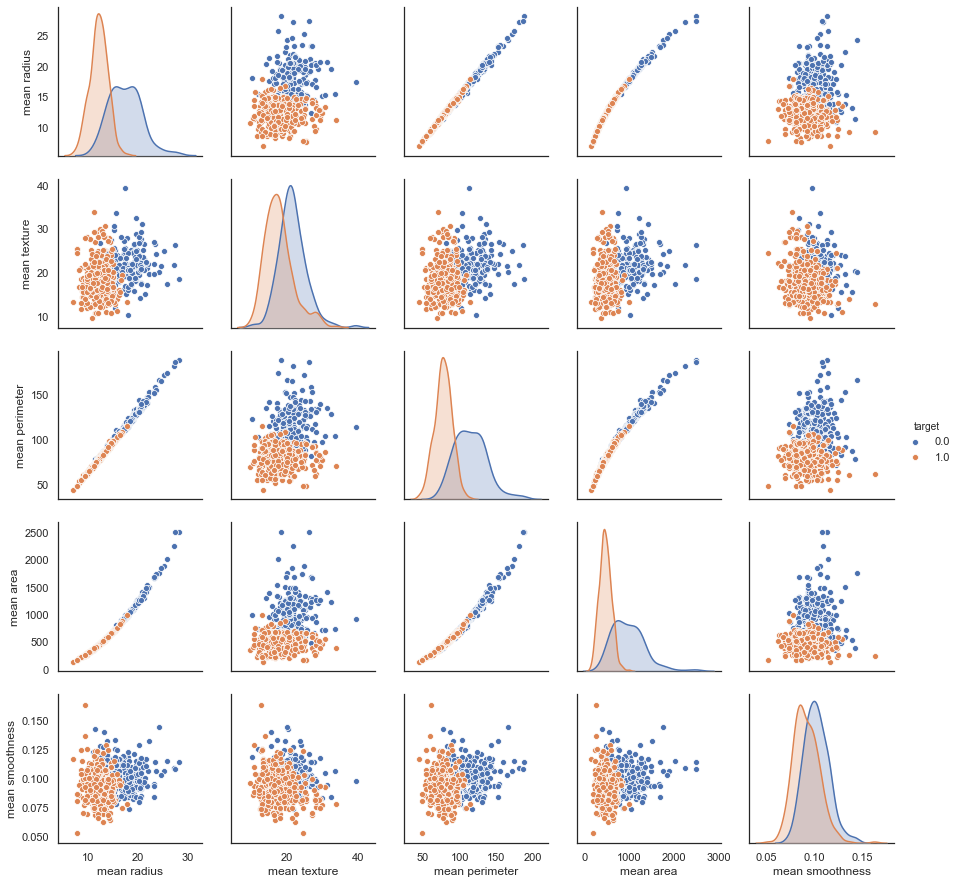

In [109]:
sns.set(style="white")

sns.pairplot(cancer_df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])
plt.show()

#### Desription of Pairplot above
To give us a bit more of the sense of our dataset, we have visualized the first 5 features. The blue dots ('0') represent the malignant tumors, whereas the orange ones ('1') are benign. If we look at mean area, for instance, we see that in general, malignant tumors are more than our benign ones. Already from our plots above, we can see that we can probably linearly seperate most of our data according to these features. This gives us a strong sense that we can use support vectors to classify our cancer cells as either malignant or benign.

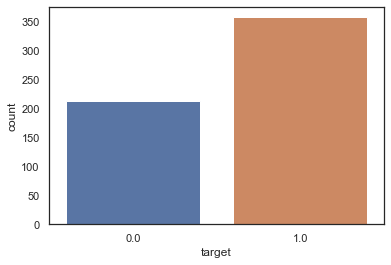

,0
target,
0.0,212
1.0,357


In [120]:
sns.countplot(cancer_df['target'])
plt.show()

pd.DataFrame(cancer_df.groupby('target').size())

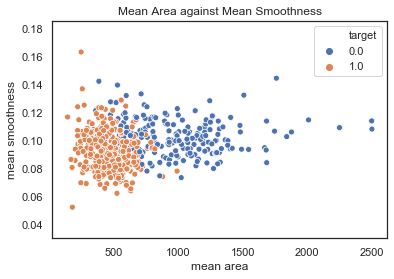

In [123]:
sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue='target', data=cancer_df)
plt.title('Mean Area against Mean Smoothness')
plt.show()

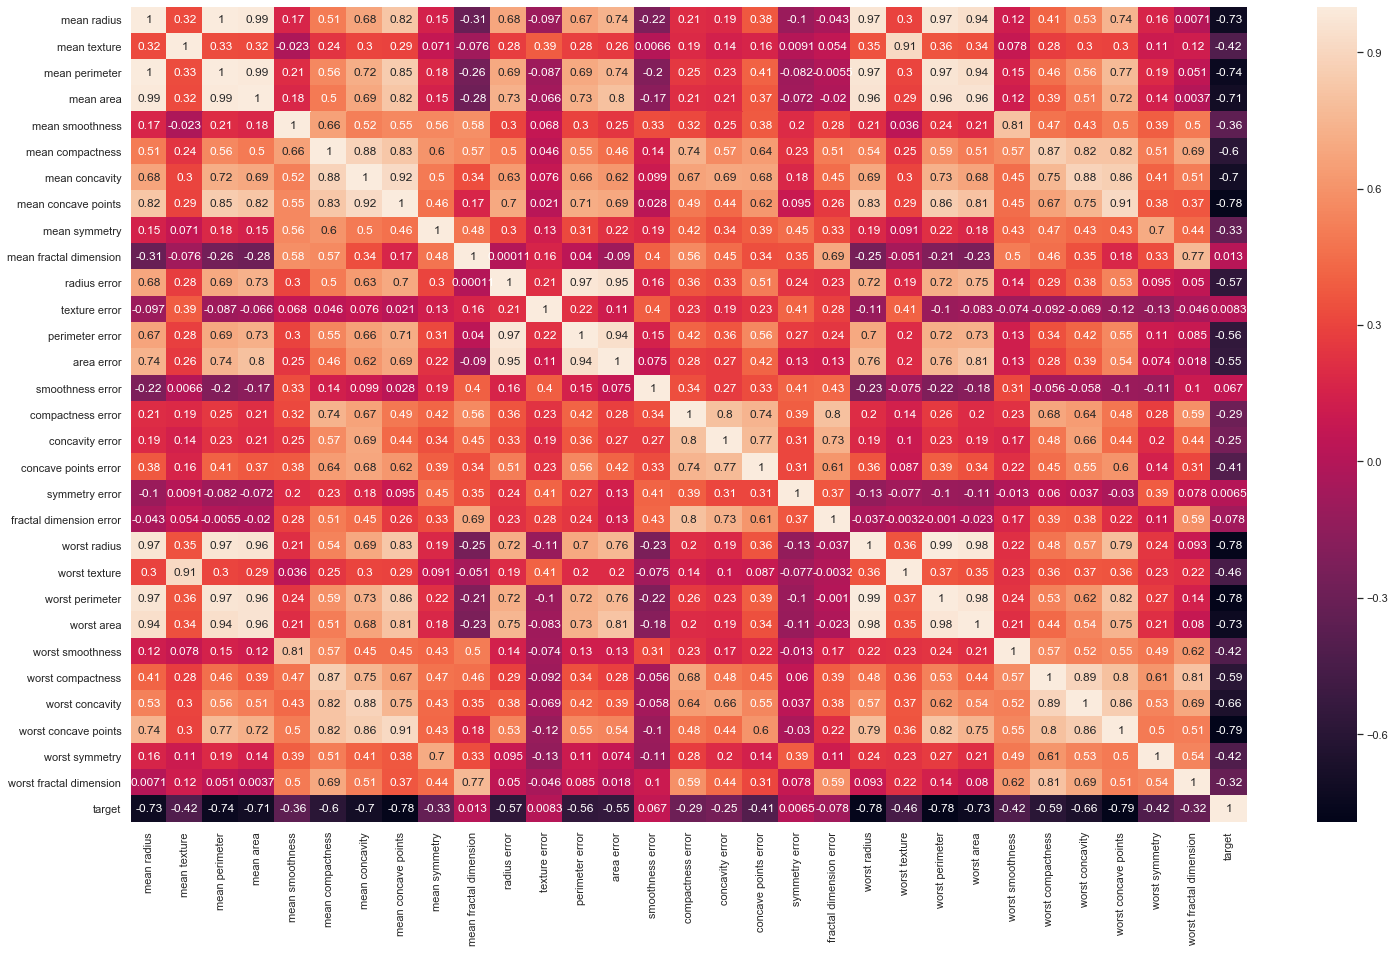

In [146]:
plt.figure(figsize=(25, 15))
sns.heatmap(cancer_df.corr(), annot=True)

# Fixing python's update for cutting off top and bottom part of heatmap (stupid matplotlib!)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

## Base Classifier Model (SVM)

In [157]:
# Split our dataset into X features matrix and y prediction
X = cancer_df.drop(['target'], axis=1)
y = cancer_df['target']

# Subset our data into a training set and a testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Base SVM model
from sklearn.svm import SVC
svm_classifier = SVC(gamma = 'auto')
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing and Evaluating our Model

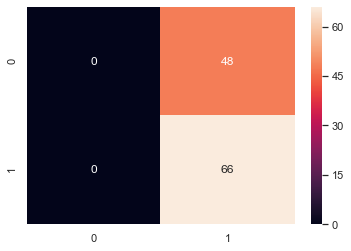

In [196]:
# Make Predictions using our Classifier
y_predict = svm_classifier.predict(X_test)

# Evaluating our Base Model
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
svm_cm = confusion_matrix(y_pred=y_predict, y_true=y_test)
sns.heatmap(svm_cm, annot=True)
# Fixing python's update for cutting off top and bottom part of heatmap (stupid matplotlib!)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [197]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        48
         1.0       0.58      1.00      0.73        66

    accuracy                           0.58       114
   macro avg       0.29      0.50      0.37       114
weighted avg       0.34      0.58      0.42       114



C:\Users\edcha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We can tell from this that our base model does a terrible job. Our accuracy here is way off and we will need to now improve our model using optimization techniques. 

## Improving our Model: Data Normalization & Feature Selection
We will first improve our model by normalizing our features to better scale them. We will do a unity-based normalization to bring all values into the range [0, 1]:

$$ X' = \frac{X-X_{min}}{X_{max}-X_{min}} $$

In [171]:
min_train = X_train.min()
range_train = (X_train - min_train).max()

X_train_scaled = (X_train - min_train)/(range_train)

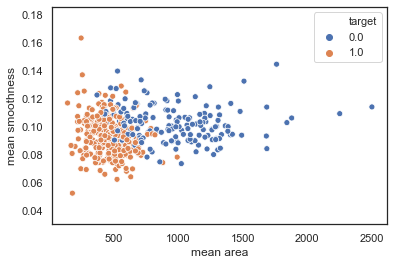

In [177]:
sns.scatterplot(x=X_train['mean area'], y=X_train['mean smoothness'], hue=y_train)
plt.show() # Our original, non-scaled dataset plotted

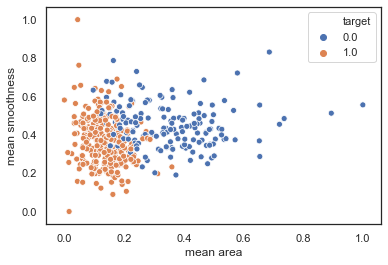

In [178]:
sns.scatterplot(x=X_train_scaled['mean area'], y=X_train_scaled['mean smoothness'], hue=y_train)
plt.show() # Our scaled dataset plotted

Now let's run our classifier on our scaled features and see it's performance increase:

In [198]:
# Scale our test set as well!
min_test = X_test.min()
range_test = (X_test - min_test).max()

X_test_scaled = (X_test - min_test)/(range_test)

In [199]:
svm_classifier.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

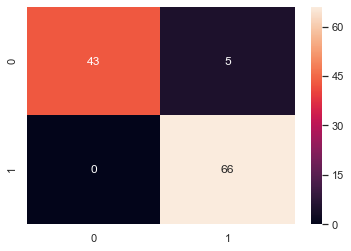

In [200]:
y_predict = svm_classifier.predict(X_test_scaled)
new_cm = confusion_matrix(y_test, y_predict)

sns.heatmap(new_cm, annot=True)

# Fixing python's update for cutting off top and bottom part of heatmap (stupid matplotlib!)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

Much better! We only have 5 type I errors now, or false positives.

In [201]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Using just normalization, we already improved our precision to 96%. That is a huge increase. We will now continue our optimization with another kind of optimization.

## Improving our Model: Parameter Optimization
We will need to deal with our boundary made by SVM being too overfit/loose. We will use a new parameter $c$ which specifies the penalty for misclassifying a datapoint: a small value for $c$ will make the cost (penalty) of our misclassification to be low, whereas a large value for $c$ will make the penalty high (with some risk of overfitting). 

Another parameter to deal with is the gamma parameter. This controls how far the influence of a single training set reaches. A large gamma will have a close reach, using support vectors that are close to our hyperplane boundary. This causes overfitting. A small gamma will have a farther reach, which will lead to a more generalized solution with a looser hyperplane boundary. The risk here is underfitting.

To optmize these two parameters, $c$ and Gamma, we will use something known as a Grid Search.

In [206]:
# Grid Search Options for our GridSearch
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}

In [207]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=4)
grid.fit(X_train_scaled, y_train)

C:\Users\edcha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.967, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.921, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.947, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.914, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.888, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.868, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [208]:
# Print our best values for parameters
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

According to our gridsearch, the best parameters for our final model will be $c = 10$ and $gamma = 0.1$.

In [211]:
grid_prediction = grid.predict(X_test_scaled)

Let's do a final evaluation of our model with a confusion matrix and report:

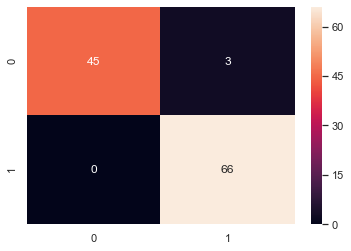

In [214]:
final_cm = confusion_matrix(y_test, grid_prediction)
sns.heatmap(final_cm, annot=True)

# Fixing python's update for cutting off top and bottom part of heatmap (stupid matplotlib!)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

We've now increased our type I errors to only 3 points, which is a 2 point improvement of our normalized model.

In [216]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        48
         1.0       0.96      1.00      0.98        66

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Conclusion
We now have a 97% accuracy in our classification using support vector machines. This kind of classifier model can help assist physicians who want a second opinion according to machine learning. We can further improve our model by looking into some deep learning techniques and computer vision to directly classify cancer using images. The implementation of this could be integrated into a cancer detection system and could, in the future, be further developed so that perhaps, in the future, patients could even do some form of early triage or early detection on their own in the privacy of their home as a sort of personal check-up (not to replace a doctor).